<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Data Preprocessing: Binning**
---



## **What is binning?**

Binning (also called discretization) is the process of converting continuous variables into categorical intervals (bins or buckets). It helps reduce the impact of small observation errors and can simplify models or make patterns more apparent.

## **Why use binning?**

1. Reduce noise in data by grouping continuous values.

2. Simplify analysis or improve model performance.

3. Enhance visualization (e.g. histograms).

4. Prepare features for algorithms that prefer categorical input (like decision trees).

## **Binning role in mitigating the effect of outliers**

Binning helps reduce the impact of outliers by grouping values into discrete categories, effectively “smoothing” extreme values that might otherwise distort analysis.

**How It Works**

Let’s say you have this set of income data:

[35,000, 38,000, 42,000, 45,000, 1,000,000]

If you calculate the mean, the outlier (1 million) will skew the average.

But with binning, you can group values like this:

* 0–50K → "Low"

* 50K–100K → "Medium"

* 100K+ → "High"

After binning:

['Low', 'Low', 'Low', 'Low', 'High']

Now the extreme value (1,000,000) is contained in a broader category and doesn’t influence the central tendency of other bins. You’re analyzing categories, not raw values.

## **Why this matters**

* Outliers can distort machine learning models, especially models sensitive to scale (e.g., linear regression, k-means).

* Binning limits their influence by putting them into a fixed range.

* It helps you retain important trends while filtering out noise.

**Example**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

# ggplot
plt.style.use('ggplot')

In [2]:
# Example

ages = [15, 22, 37, 45, 51, 62, 70, 85]
age_bins = [0, 18, 35, 60, 100]
age_labels = ['Teen', 'Young Adult', 'Adult', 'Senior']

df = pd.DataFrame({'Age': ages})
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

df


,Age,Age_Group
0,15,Teen
1,22,Young Adult
2,37,Adult
3,45,Adult
4,51,Adult
5,62,Senior
6,70,Senior
7,85,Senior


In [3]:
# Example

data = [35000, 38000, 42000, 45000, 90000, 1000000]
bins = [0, 50000, 100000, float('inf')]
labels = ['Low', 'Medium', 'High']

df = pd.DataFrame({'Income': data})
df['Income_Binned'] = pd.cut(df['Income'], bins=bins, labels=labels)

df


,Income,Income_Binned
0,35000,Low
1,38000,Low
2,42000,Low
3,45000,Low
4,90000,Medium
5,1000000,High


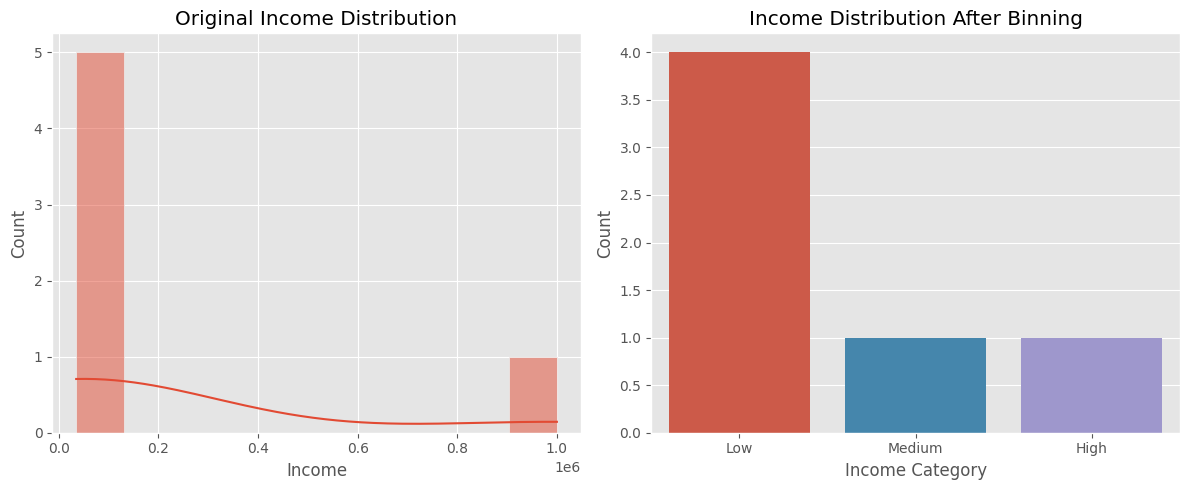

In [4]:
# Visual comparison between binned data and non-binning

# Sample data with an outlier
data = [35000, 38000, 42000, 45000, 90000, 1000000]
df = pd.DataFrame({'Income': data})

# Binning
bins = [0, 50000, 100000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Income_Binned'] = pd.cut(df['Income'], bins=bins, labels=labels)

# Visualization
plt.figure(figsize=(12, 5))

# Histogram of original data
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], bins=10, kde=True)
plt.title('Original Income Distribution')
plt.xlabel('Income')

# Bar plot of binned data
plt.subplot(1, 2, 2)
sns.countplot(x='Income_Binned', hue='Income_Binned', data=df, legend=False)
plt.title('Income Distribution After Binning')
plt.xlabel('Income Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## **Methods of Binning**


**Equal-width binning**

* All bins have the same size (range).

**Equal-frequency binning**

* Each bin contains the same number of values.





## **Study Case**

Now, will conduct exercise using 'tips' dataset to practice binning.

In [5]:
# loading  dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


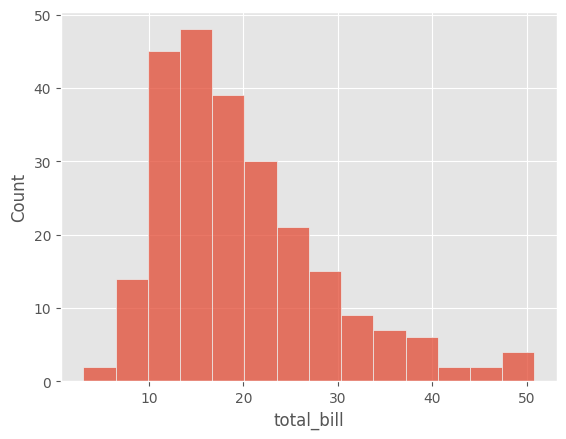

In [6]:
# Histogram
sns.histplot(data=df, x='total_bill')
plt.show()

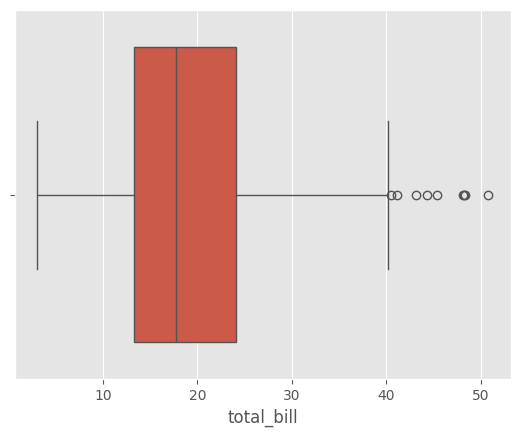

In [7]:
# Boxplot
sns.boxplot(data=df, x='total_bill')
plt.show()

We have some outliers that mostly located above 40 USD

In [8]:
# Statistical descriptive
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 1. Equal Frequency

* All bins have similar frequency
* Those bins have differences in values range
* Use pd.qcut()

In [9]:
df = df[['total_bill']].copy()
df.head()

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59


In [10]:
df['total_bill_eq_freq'] = pd.qcut(df['total_bill'], q=5) # Divide into 5 quantiles
df.head()

,total_bill,total_bill_eq_freq
0,16.99,"(16.222, 19.818]"
1,10.34,"(3.069, 12.636]"
2,21.01,"(19.818, 26.098]"
3,23.68,"(19.818, 26.098]"
4,24.59,"(19.818, 26.098]"


In [11]:
df['total_bill_eq_freq'].value_counts()
# Most bins have equal frequency (about 49)
# Different in range of value or interval

,count
total_bill_eq_freq,
"(3.069, 12.636]",49
"(12.636, 16.222]",49
"(19.818, 26.098]",49
"(26.098, 50.81]",49
"(16.222, 19.818]",48


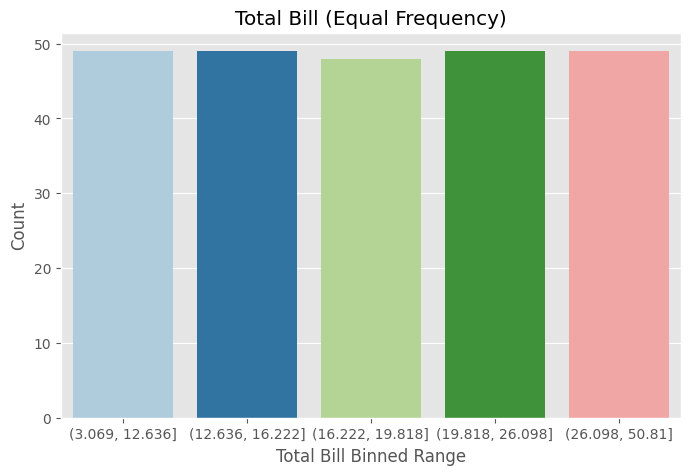

In [12]:
# Visualization
# Plotting
plt.figure(figsize=(8, 5))
sns.countplot(x='total_bill_eq_freq', data=df, palette='Paired')


# Add titles and labels
plt.title('Total Bill (Equal Frequency)')
plt.xlabel('Total Bill Binned Range')
plt.ylabel('Count')
plt.show()

Most bars contain frequency of 49

## 2. Equal Interval

* All bins have the same range of value
* Not similar frequency
* Use pd.cut()

In [13]:
df['total_bill_eq_interval'] = pd.cut(df['total_bill'], bins=5)
df.head()

,total_bill,total_bill_eq_freq,total_bill_eq_interval
0,16.99,"(16.222, 19.818]","(12.618, 22.166]"
1,10.34,"(3.069, 12.636]","(3.022, 12.618]"
2,21.01,"(19.818, 26.098]","(12.618, 22.166]"
3,23.68,"(19.818, 26.098]","(22.166, 31.714]"
4,24.59,"(19.818, 26.098]","(22.166, 31.714]"


In [14]:
df['total_bill_eq_interval'].value_counts()
# Equal interval (about 9.54)
# Not equal in frequency

,count
total_bill_eq_interval,
"(12.618, 22.166]",119
"(22.166, 31.714]",50
"(3.022, 12.618]",49
"(31.714, 41.262]",19
"(41.262, 50.81]",7


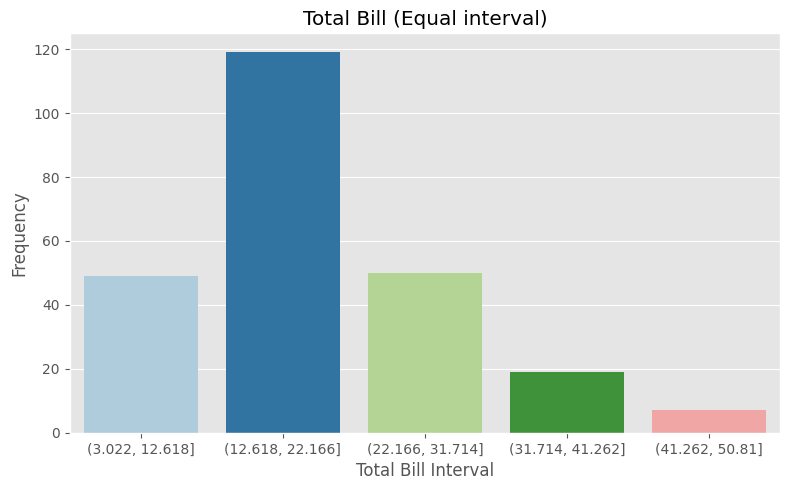

In [15]:
# Plotting the count of each bin
plt.figure(figsize=(8, 5))
sns.countplot(x='total_bill_eq_interval', data=df, palette='Paired')

# Improve readability
plt.title('Total Bill (Equal interval)')
plt.xlabel('Total Bill Interval')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

# **KBinDiscretization**

In [16]:
# Importing library
from sklearn.preprocessing import KBinsDiscretizer

In [17]:
disc = KBinsDiscretizer(strategy='uniform', n_bins=5, encode='ordinal')

# strategy='quantile' --> equal frequency --> pd.qcut
# strategy='uniform' --> equal interval --> pd.cut

In [18]:
df['total_bill_uniform'] = disc.fit_transform(df[['total_bill']])
df.head()

,total_bill,total_bill_eq_freq,total_bill_eq_interval,total_bill_uniform
0,16.99,"(16.222, 19.818]","(12.618, 22.166]",1.0
1,10.34,"(3.069, 12.636]","(3.022, 12.618]",0.0
2,21.01,"(19.818, 26.098]","(12.618, 22.166]",1.0
3,23.68,"(19.818, 26.098]","(22.166, 31.714]",2.0
4,24.59,"(19.818, 26.098]","(22.166, 31.714]",2.0


In [19]:
df['total_bill_uniform'].value_counts()

,count
total_bill_uniform,
1.0,119
2.0,50
0.0,49
3.0,19
4.0,7


## **KBinsDiscretizer application**

In [20]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
# load dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/disk.csv'
df = pd.read_csv(url)
df.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


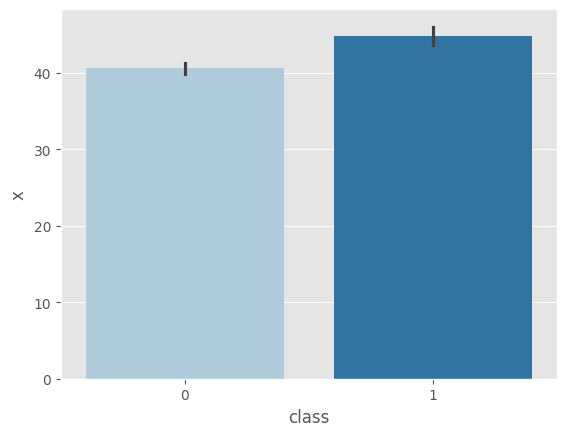

In [22]:
# EDA
sns.barplot(data=df, x='class', y='x', palette='Paired');

In [23]:
# define X y
X = df[['x']]
y = df['class']

In [24]:
# data spitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

## **a. Model without binning**

In [25]:
# fit
model = LogisticRegression(random_state=10)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# accuracy
accuracy_score(y_test, y_pred)

0.5163398692810458

## **b. Model with binning (Ordinal Encoding)**

In [26]:
# define discretizer
disc_ordinal = KBinsDiscretizer(strategy='uniform', n_bins=7, encode='ordinal')

# fit to X_train
disc_ordinal.fit(X_train)

# transform X_train & X_test
X_train_disc = disc_ordinal.transform(X_train)
X_test_disc = disc_ordinal.transform(X_test)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Preprocessing in ColumnTransformer**

In [28]:
transformer = ColumnTransformer([
    ('binning', disc_ordinal, ['x'])
], remainder='passthrough')

In [29]:
# define algo
model = LogisticRegression(random_state=10)

# pipeline - connecting binning and model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_binning_ordinal = pipe_model.predict(X_test)

accuracy_score(y_test, y_pred_binning_ordinal)

0.5

In [30]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_binning_ordinal))

0.5163398692810458
0.5


## **c. Model with binning (Onehot Encoding)**

In [31]:
# define discretizer
disc_onehot = KBinsDiscretizer(strategy='uniform', n_bins=7, encode='onehot')

transformer = ColumnTransformer([
    ('binning', disc_onehot, ['x'])
], remainder='passthrough')

In [32]:
# define algo
model = LogisticRegression(random_state=10)

# pipeline - connecting binning and model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_binning_onehot = pipe_model.predict(X_test)

accuracy_score(y_test, y_pred_binning_onehot)

0.7418300653594772

In [33]:
print('Without binning', accuracy_score(y_test, y_pred))
print('binning - ordinal encoding', accuracy_score(y_test, y_pred_binning_ordinal))
print('binning - onehot encoding', accuracy_score(y_test, y_pred_binning_onehot))

Without binning 0.5163398692810458
binning - ordinal encoding 0.5
binning - onehot encoding 0.7418300653594772


**Questions**

Why do the accuracy score is lower when using ordinal encode, while the score is higher when we are using the onehot encoder?

In [34]:
df.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [35]:
df['x_uniform_ordinal'] = disc_ordinal.fit_transform(X)
df.head()

,x,class,x_uniform_ordinal
0,51,0,4.0
1,19,1,0.0
2,66,1,6.0
3,35,0,2.0
4,64,1,6.0


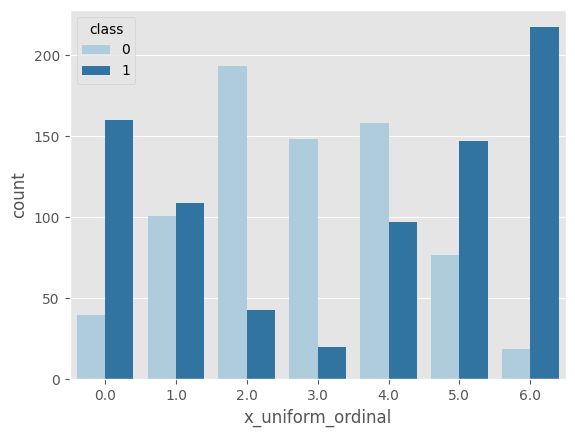

In [36]:
# Display both class (0 and 1) proportion on each bin
sns.countplot(data=df, x='x_uniform_ordinal', hue='class', palette='Paired')
plt.show()

It is because the relationship among feature and target was not linear.



## **The result of encoding (after binning)**

In [37]:
x_onehot = disc_onehot.fit_transform(df[['x']])

In [38]:
pd.DataFrame.sparse.from_spmatrix(x_onehot)

,0,1,2,3,4,5,6
0,0,0,0,0,1.0,0,0
1,1.0,0,0,0,0,0,0
2,0,0,0,0,0,0,1.0
3,0,0,1.0,0,0,0,0
4,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...
1524,0,0,0,0,0,1.0,0
1525,0,0,0,0,0,0,1.0
1526,0,0,0,0,1.0,0,0
1527,0,1.0,0,0,0,0,0
